Spotify Genre Classification

CSC 4220-001 Data Mining / Machine Learning
Shelby Smith, Marc Ebersberger Jr
April - 2023

Problem Description: As spotify, we want to be able to validate that a genre a artist submits is the *correct*


In [2]:
# Imports
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset:

**track_id:** `The Spotify ID for the track`

**artists:** `The artists' names who performed the track. If there is more than one artist, they are separated by a ;`

**album_name:** `The album name in which the track appears`

**track_name:** `Name of the track`

**popularity:** `The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.`

**duration_ms:** `The track length in milliseconds`

**explicit:** `Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)`

**danceability:** `Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable`

**energy:** `Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale`

**key:** `The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1`

**loudness:** `The overall loudness of a track in decibels (dB)`

**mode:** `Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0`

**speechiness:** `Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer
to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks`

**acousticness:** `A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic`

**instrumentalness:** `Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly
"vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content`

**liveness:** `Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above
0.8 provides strong likelihood that the track is live`

**valence:** `A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric),
while tracks with low valence sound more negative (e.g. sad, depressed, angry)`

**tempo:** `The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the
average beat duration`

**time_signature:** `An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time
signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.`

**track_genre:** `The genre in which the track belongs`



In [3]:
df = pd.read_csv(Path('../data/dataset.csv'))
print('Shape: ',df.shape)
print('Duplicated Rows: ', df.duplicated().unique()[0])
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

df

Shape:  (114000, 21)
Duplicated Rows:  False


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Missing Values

Only one row has missing values.
Since the values missing are columns we plan to drop, we do not remove the row from the dataset

In [5]:
print(df.isna().sum())
df[df['artists'].isna()]

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### Distribution of rows per Genre

Even Distribution of songs per Genre

Unique Genres:  114


Text(0.5, 1.0, 'Genre Datapoints')

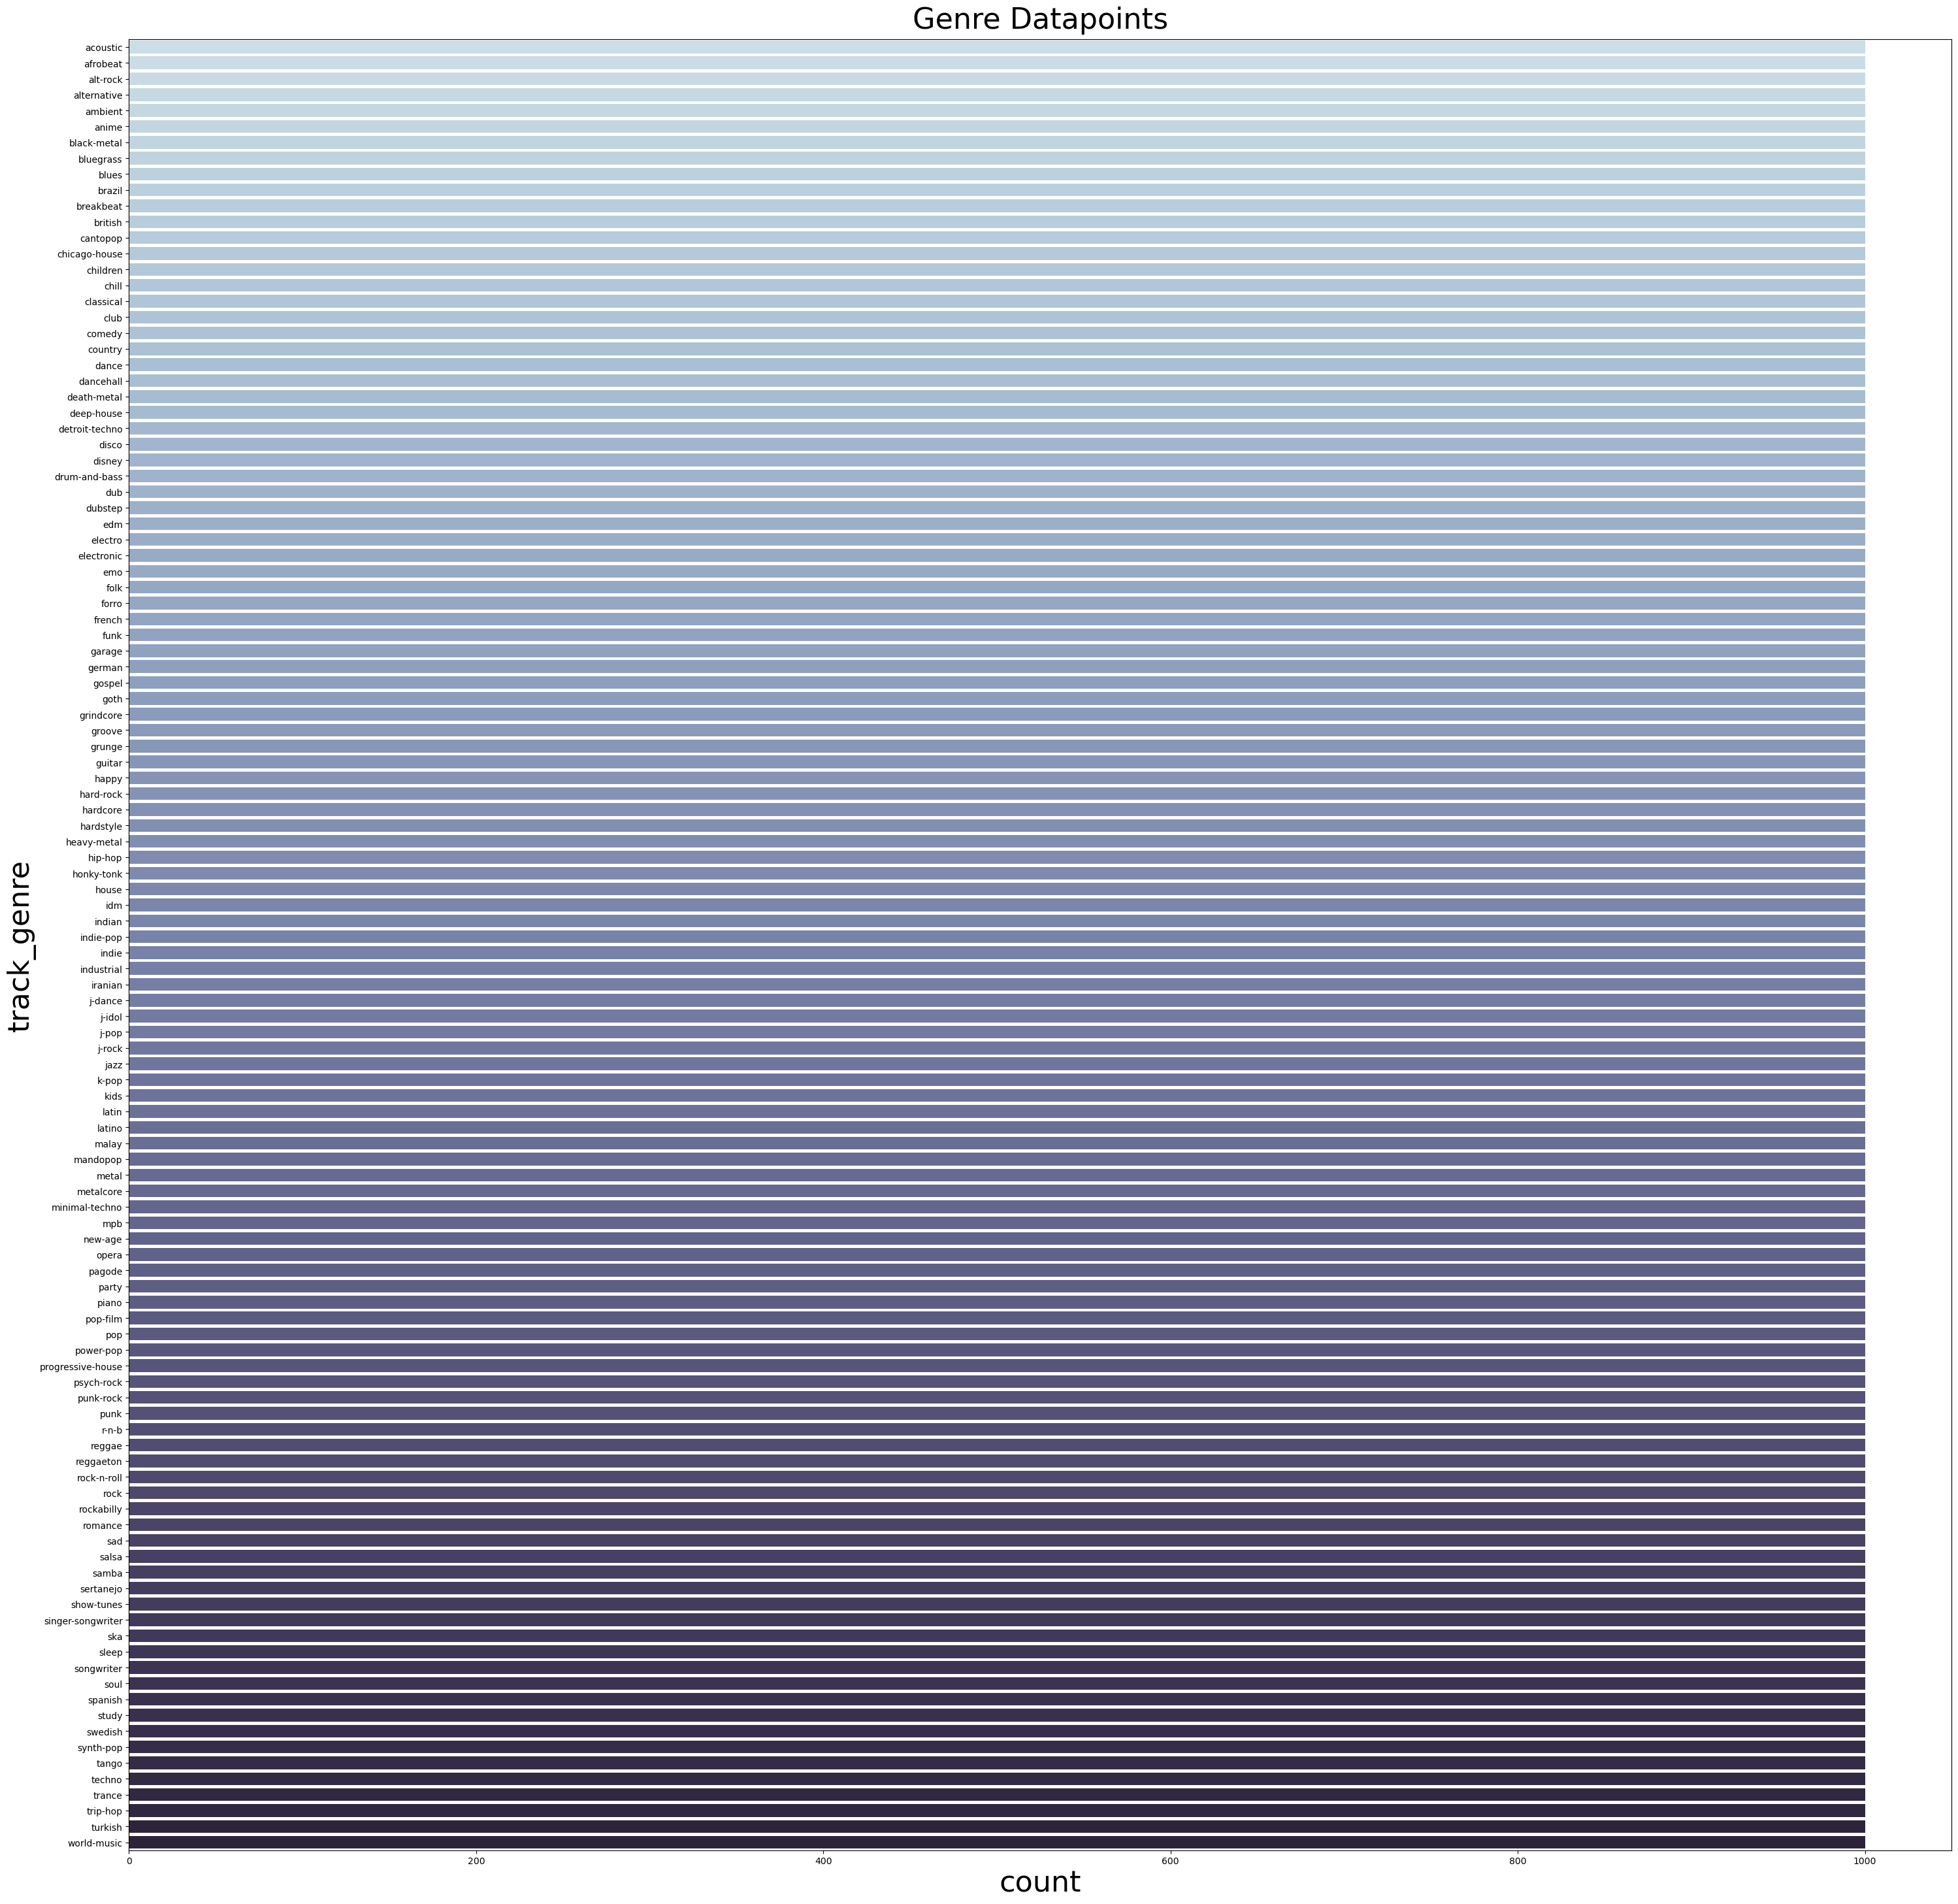

In [6]:
print('Unique Genres: ',df.track_genre.nunique())
plt.figure(figsize=(36,36))
plt.xlabel('Count', fontsize=32)
plt.ylabel('Genre', fontsize=32)
sns.countplot(y=df.track_genre, palette='ch:s=.25,rot=-.25').set_title('Genre Datapoints', fontdict={'fontsize':32}, pad=12)

### Distribution of Features

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >, <Axes: >]],
      dtype=object)

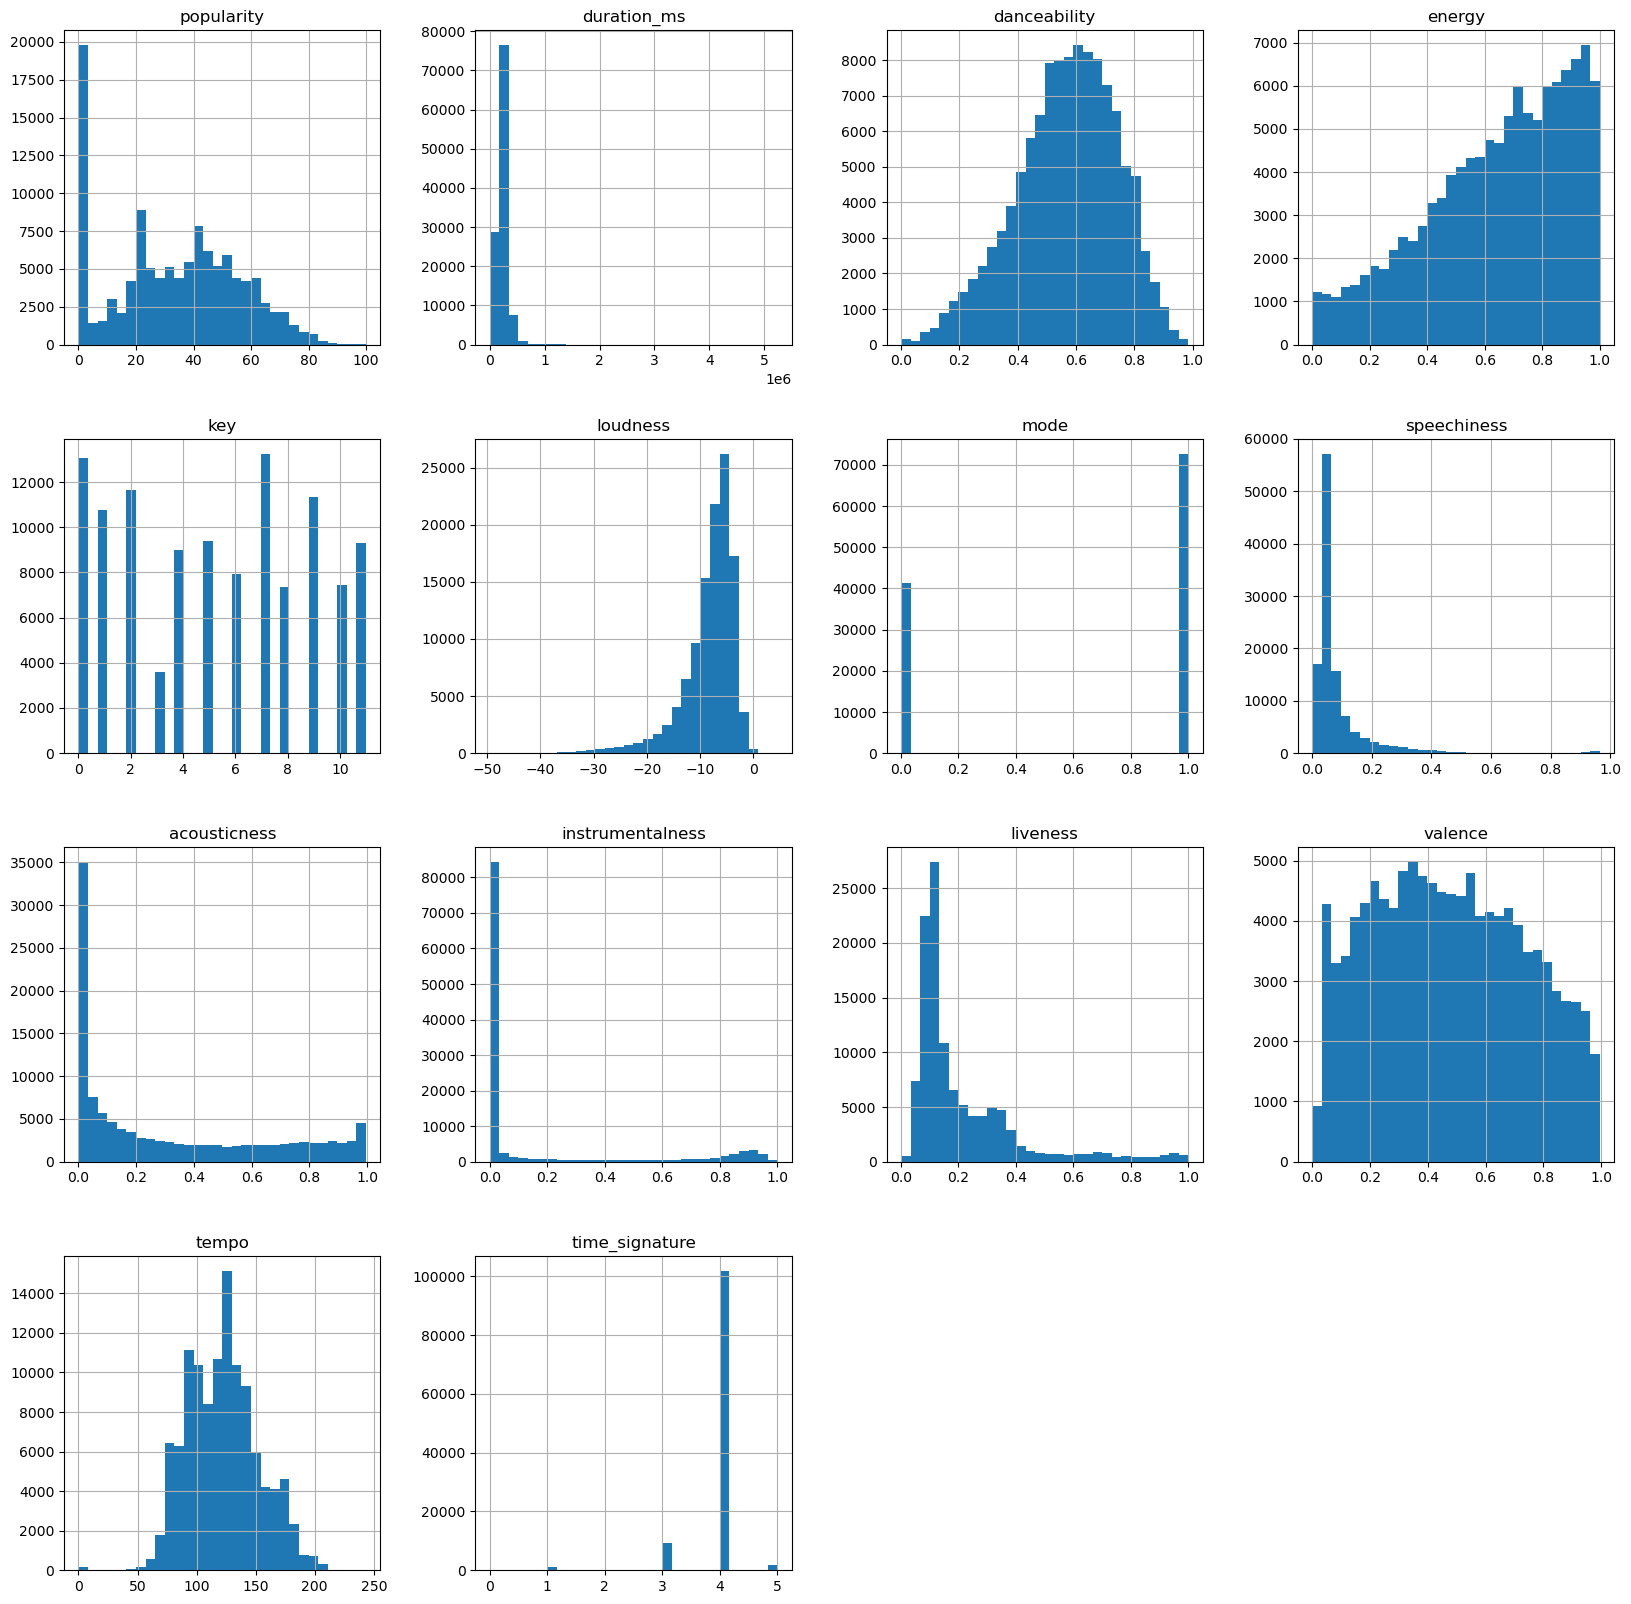

In [7]:
df.hist(bins=30, figsize=(20,20))

### Correlation

Almost all the features have very low correlation.
The only two features that have a high correlation are 
*   *Loudness* and *Acousticness*
*   *Energy* and *Acousticness*. 

We will come back to those later as they might affect the models performance

/var/folders/gv/7n3c64dx2936rpr3757hlbsh0000gn/T/ipykernel_42709/2984346387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<Axes: >

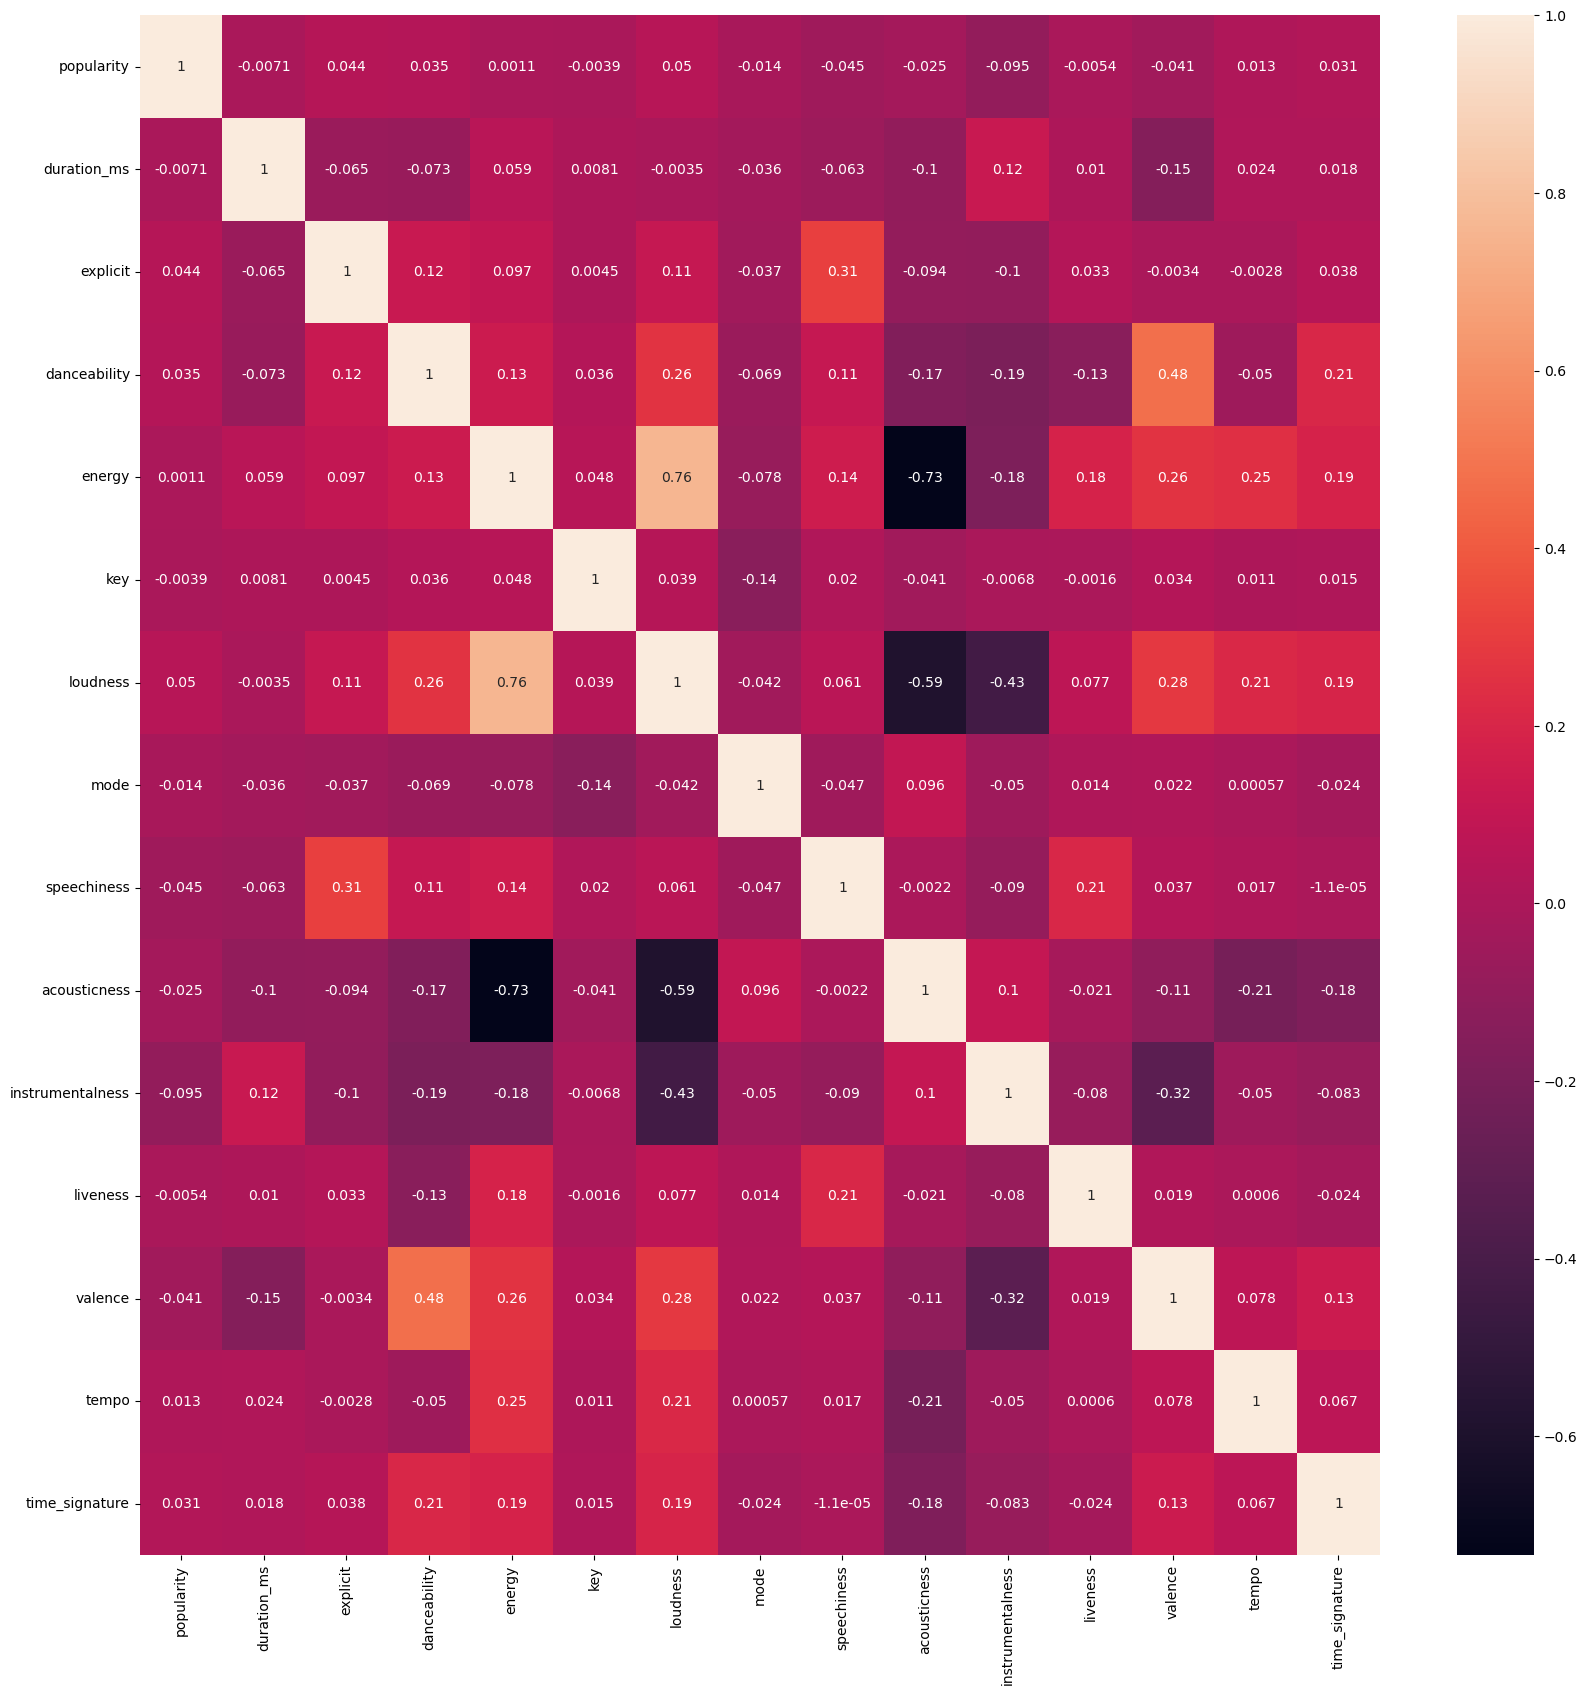

In [8]:
correlations = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)

### Cleaning the Dataset

Removing Catagorical Features that do not plat any part in the models:

track_id, artists, albumn_name, track_name, explicit, mode, popularity, time_signature, key


Generalize Genres:

Currently there are 114 Genres, which we think is alot. So we decided to generalize the genres to make it easier on the models

In [9]:
skip_list = ['anime', 'children', 'chill', 'comedy', 'dancehall', 'disney', 'folk', 'groove', 'guitar', 'happy', 'j-idol', 'kids', 'malay', 'mpb', 'party', 'piano', 'sad', 'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter', 'study']
world_list = ['afro-beat', 'british', 'cantopop', 'french', 'german', 'indian', 'iranian', 'swedish', 'brazil', 'turkish', 'world-music']
blues_list = ['acoustic', 'blues']
alt_list = ['alt-rock', 'alternative', 'goth', 'grunge']
elect_list = ['ambient', 'drum-and-bass', 'idm', 'synth-pop', 'trip-hop', ]
metal_list = ['black-metal', 'death-metal', 'grindcore', 'hardcore', 'heavy-metal', 'metal', 'metalcore']
country_list = ['bluegrass', 'country', 'honky-tonk', 'sertanejo']
house_list = ['chicago-house', 'deep-house', 'trance', 'house', 'progressive-house',]
dance_list = ['breakbeat', 'club', 'dance','detroit-techno', 'dubstep', 'edm', 'garage', 'hardstyle', 'j-dance', 'minimal-techno', 'techno', ]
class_list = ['classical', 'romance']
latin_list = ['forro', 'latin', 'latino', 'pagode', 'reggaeton', 'salsa', 'samba', 'tango', 'spanish']
rb_list = ['disco', 'funk', 'r-n-b', 'dub', 'reggae', 'soul', ]
gospil_list = ['gospil']
rock_list = ['hard-rock', 'j-rock', 'psych-rock', 'punk-rock', 'rock-n-roll', 'rock', 'rockabilly']
hip_list = ['hip-hop']
pop_list = ['indie-pop', 'j-pop', 'k-pop', 'mandopop', 'pop', 'power-pop',]
indie_list = ['indie']
indus_list = ['industrial']
jazz_list = ['jazz']
opera_list = ['opera']

def generalize_genre(genre):
    if genre in blues_list: return 'Blues'
    if genre in alt_list: return 'Alternative'
    if genre in elect_list: return 'Electronic'
    if genre in metal_list: return 'Metal'
    if genre in country_list: return 'Country'
    if genre in house_list: return 'House'
    if genre in dance_list: return 'Dance'
    if genre in class_list: return "Classical"
    if genre in latin_list: return 'Latin'
    if genre in rb_list: return 'R&B'
    if genre in gospil_list: return 'Gospil'
    if genre in rock_list: return 'Rock'
    if genre in hip_list: return 'Hip-Hop'
    if genre in pop_list: return 'Pop'
    if genre in indie_list: return 'Indie'
    if genre in indus_list: return 'Industrial'
    if genre in jazz_list: return 'Jazz'
    if genre in opera_list: return 'Opera'
    else: return 'Skip'


def max_absolute_scaling(df):
    'Rescale column between range -1 & 1 using Maximum Absolute Scaling'
    for col in df.columns:
        try:
            df[df[col]] = scaler.fit_transform(df[df[col]])
        except TypeError:
            pass
    return df

def cleaning(df):
    # Generalize Genres
    print('Previous Unique Genres: ',temp.track_genre.nunique())
    df.track_genre = df.track_genre.apply(lambda x: generalize_genre(x))
    print('Generalized Unique Genres: ',temp.track_genre.nunique())

    # Dropping Columns
    drop_columns = ['track_id','artists','album_name','track_name','explicit','key','mode','time_signature','popularity']
    df.drop(columns=drop_columns, axis=1, inplace=True)
    # Drop all rows that have genres of Skip
    df = df.loc[df.track_genre != 'Skip']

    # Normalize columns
    #df = max_absolute_scaling(df)
    return df

temp = df.copy()
print('Pre Cleaning: ', temp.shape)
temp = cleaning(temp)
print('Post Cleaning: ', temp.shape)
temp.head(10)

Pre Cleaning:  (114000, 20)
Previous Unique Genres:  114
Generalized Unique Genres:  18
Post Cleaning:  (73000, 11)


,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,Blues
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,Blues
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,Blues
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,Blues
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,Blues
5,214240,0.688,0.4810,-8.807,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,Blues
6,229400,0.407,0.1470,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,Blues
7,242946,0.703,0.4440,-9.331,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,Blues
8,189613,0.625,0.4140,-8.700,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,Blues
9,205594,0.442,0.6320,-6.770,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,Blues


### Training and Evaluating Models

Not wuite sure what model to use, so we go through a handful of different ones just to get a baseline of which models perform the best

Models used: LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, DNN

Also, removing the highly negative and positive features did not impact the performance, so we left them in

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

temp = df.copy()
temp = cleaning(temp)
X = temp.drop(columns=['track_genre'],axis=1)
y = temp['track_genre']

# Label encode target values
le = LabelEncoder()
y  = le.fit_transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalize Features
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)

def evaluate(model):
    y_pred = model.predict(X_test)
    
    accuracy = metrics.accuracy_score(Y_test,y_pred)

    print('Model Performance: ',model)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Precision = ',metrics.precision_score(Y_test,y_pred,average='micro'))
    print('Recall = ',metrics.recall_score(Y_test,y_pred,average='micro'))
    print('F1 Score = ',metrics.f1_score(Y_test,y_pred,average='micro'))

    return accuracy

Previous Unique Genres:  114
Generalized Unique Genres:  18


In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(RandomForestClassifier())

for model in model_pipeline:
    kfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print(f'{model}\t\t\tCross Score: {round(cv_results.mean(),4)}')
    model.fit(X_train, Y_train)
    accuracy = evaluate(model)


LogisticRegression(max_iter=1000, multi_class='multinomial')			Cross Score: 0.3355


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Model Performance:  LogisticRegression(max_iter=1000, multi_class='multinomial')
Accuracy = 0.12%.
Precision =  0.12226027397260274
Recall =  0.12226027397260274
F1 Score =  0.12226027397260274
KNeighborsClassifier()			Cross Score: 0.3689


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Model Performance:  KNeighborsClassifier()
Accuracy = 0.15%.
Precision =  0.14883561643835616
Recall =  0.14883561643835616
F1 Score =  0.14883561643835616
DecisionTreeClassifier()			Cross Score: 0.3725


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Model Performance:  DecisionTreeClassifier()
Accuracy = 0.18%.
Precision =  0.178013698630137
Recall =  0.178013698630137
F1 Score =  0.178013698630137
GaussianNB()			Cross Score: 0.2733
Model Performance:  GaussianNB()
Accuracy = 0.03%.
Precision =  0.02863013698630137
Recall =  0.02863013698630137
F1 Score =  0.02863013698630137
RandomForestClassifier()			Cross Score: 0.4765


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model Performance:  RandomForestClassifier()
Accuracy = 0.32%.
Precision =  0.32267123287671234
Recall =  0.32267123287671234
F1 Score =  0.32267123287671234


### Random Forest Classifier Hyper Parameters

We used RandomSearch CV to find the optimal hyper parameters.

After getting the new parameters, the increase of the accuracy was only 1.3% better.

In [13]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100,200,300,400]
# Maximum number of levels in tree
max_depth = [10,20,30,40]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, n_iter=10 ,param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  19.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  19.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  19.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  18.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  18.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  18.5s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  16.5s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  1

In [15]:
print(rf_random.best_params_)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}


In [16]:
base_model = RandomForestClassifier()
base_model.fit(X_train,Y_train)
base_accuracy = evaluate(base_model)

rf_random_accuracy = evaluate(rf_random.best_estimator_)

print('Improvement of {:0.2f}%.'.format( 100 * (rf_random_accuracy - base_accuracy) / base_accuracy))

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model Performance:  RandomForestClassifier()
Accuracy = 0.32%.
Precision =  0.3182191780821918
Recall =  0.3182191780821918
F1 Score =  0.3182191780821918


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model Performance:  RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=400)
Accuracy = 0.32%.
Precision =  0.3223972602739726
Recall =  0.3223972602739726
F1 Score =  0.3223972602739726
Improvement of 1.31%.


### Deep Neural Network

We used a grid search to find optimal hyper parameters for the DNN

Hyper-parameters used: {'neurons': 128, 'layers': 4, 'dropout_rate': 0.2, 'act_o': 'sigmoid', 'act_h': 'relu', 'act': 'relu'}

Accuracy: 43%

In [53]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

#Encode the Target Values
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes=17, dtype="int")
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes=17, dtype="int")

# Randomize Search for Optimal Hyper Parameters
neurons = [128, 256]
layers = [2,3,4]
dropout_rate = [0.0, 0.2]
act = ['relu', 'sigmoid']
act_h = ["relu", 'sigmoid']
act_o = ['softmax', 'sigmoid']

def tuned_model(neurons,layers,act_h,act_o, dropout_rate, act):
  # create model
  model = Sequential()
  model.add(Dense(neurons, input_dim=10, kernel_initializer='normal', activation=act_h))
  model.add(Dropout(dropout_rate))
  if layers >= 2: 
    model.add(Dense(neurons, kernel_initializer='normal', activation=act))
  if layers >= 3: 
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer='normal', activation=act))
  if layers >= 4:
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer='normal', activation=act))
  model.add(Dense(17, kernel_initializer='normal',activation=act_o))
  # Compile model
  model.compile(loss='categorical_crossentropy', metrics = "accuracy")
  return model


checkpoint_name = 'Weights\checkpoint.hdf5' 
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_weights_only = True, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
classifier = KerasClassifier(model=tuned_model,neurons = 1,layers = 2,act_h = "relu",act_o = "softmax",dropout_rate = 0.0,act = "sigmoid",callbacks=callbacks_list,epochs=250, batch_size=200, verbose=0)


param_grid = dict(neurons=neurons, layers=layers,dropout_rate=dropout_rate, act=act, act_h = act_h, act_o = act_o)
grid = RandomizedSearchCV(estimator=classifier, param_distributions = param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train_encoded,validation_data=(X_test, Y_test_encoded))

DNN = tuned_model(256,4,'relu','sigmoid', 0.2, 'sigmoid')
DNN.load_weights('Weights\checkpoint.hdf5')
DNN.summary()

print("DNN: Best: {c} using {d}".format(c= grid_result.best_score_, d= grid_result.best_params_))


Epoch 1: val_loss improved from inf to 2.60045, saving model to Weights\checkpoint.hdf5

Epoch 1: val_loss improved from inf to 2.59202, saving model to Weights\checkpoint.hdf5

Epoch 1: val_loss improved from inf to 2.59523, saving model to Weights\checkpoint.hdf5

Epoch 1: val_loss improved from inf to 3.99854, saving model to Weights\checkpoint.hdf5

Epoch 1: val_loss improved from inf to 4.25904, saving model to Weights\checkpoint.hdf5

Epoch 1: val_loss improved from inf to 155238.89062, saving model to Weights\checkpoint.hdf5

Epoch 1: val_loss improved from inf to 4.26760, saving model to Weights\checkpoint.hdf5

Epoch 1: val_loss improved from inf to 94258.69531, saving model to Weights\checkpoint.hdf5

Epoch 2: val_loss did not improve from 2.60045

Epoch 2: val_loss did not improve from 94258.69531

Epoch 2: val_loss did not improve from 155238.89062

Epoch 2: val_loss did not improve from 3.99854

Epoch 3: val_loss did not improve from 2.60045

Epoch 1: val_loss improved fr

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/tf/lib/python3.10/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/opt/anaconda3/envs/tf/lib/python3.10/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/opt/


Epoch 1: val_loss improved from inf to 182803.60938, saving model to Weights\checkpoint.hdf5

Epoch 2: val_loss did not improve from 182803.60938

Epoch 3: val_loss did not improve from 182803.60938

Epoch 4: val_loss did not improve from 182803.60938

Epoch 5: val_loss did not improve from 182803.60938

Epoch 6: val_loss did not improve from 182803.60938

Epoch 7: val_loss did not improve from 182803.60938

Epoch 8: val_loss did not improve from 182803.60938

Epoch 9: val_loss did not improve from 182803.60938

Epoch 10: val_loss did not improve from 182803.60938

Epoch 11: val_loss did not improve from 182803.60938

Epoch 12: val_loss did not improve from 182803.60938

Epoch 13: val_loss did not improve from 182803.60938

Epoch 14: val_loss did not improve from 182803.60938

Epoch 15: val_loss did not improve from 182803.60938

Epoch 16: val_loss did not improve from 182803.60938

Epoch 17: val_loss did not improve from 182803.60938

Epoch 18: val_loss did not improve from 182803.60

ValueError: Cannot assign value to variable ' dense_5/kernel:0': Shape mismatch.The variable shape (10, 256), and the assigned value shape (10, 128) are incompatible.

In [55]:
DNN = tuned_model(128,4,'relu','sigmoid', 0.2, 'sigmoid')
DNN.load_weights('Weights\checkpoint.hdf5')
DNN.summary()
print("DNN: Best: {c} using {d}".format( c= grid_result.best_score_, d= grid_result.best_params_))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1408      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

### Conclusion

The best two models we found were Random Forest Classification and a DNN.

Previously we used all 144 genres, but found that was a burden on the models and also made the accuracy low. After generalzing the genres, the performance and speed of the models increased.

Even after finding optimal hyerparameters, the accuracy of the models were still pretty low. We think this is because alot of genres share similar featrues, so it is hard to distinguish one genre from another. Sub Genres and Genres that blend one or more are the biggest source on confusion. 